### Which MOEA is the Best ?

Algorithms to be considered
* SPEA 2
* NSGA 2
* RNSGA2
* MOEA/D (Chebychev , Weighted sum , Penalty Boundary Intersection)
* NSGA 3

Literature Review:
* papers on all these algorithms (Foundational Papers)
* Test Problems Definitions 
* Evaluation Metrics (Strongly Pareto Compliant and Weakly Pareto Compliant)

In [53]:
from pymoo.util.function_loader import is_compiled;print('Compiled Extensions: ', is_compiled())
import numpy as np
from pymoo.util.plotting import plot

Compiled Extensions:  True


In [54]:
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
from pymoo.indicators.hv import HV


In [55]:
# Hypervolume of pareto front of problem for n_vars = 2,3,5,10
problem_2 = DTLZ2(n_obj=2,n_vars=2)
original_pareto_front_2 = problem_2.pareto_front()
objective_nvar2_1 = [i[0] for i in original_pareto_front_2]
objective_nvar2_2 = [i[1] for i in original_pareto_front_2]
ref_vector_2 = [max(objective_nvar2_1),max(objective_nvar2_2)]
ind = HV(ref_point=ref_vector_2)
Hypervolume_nvar2 = ind(original_pareto_front_2)


problem_3 = DTLZ2(n_obj=2,n_vars=3)
original_pareto_front_3 = problem_3.pareto_front()
objective_nvar3_1 = [i[0] for i in original_pareto_front_3]
objective_nvar3_2 = [i[1] for i in original_pareto_front_3]
ref_vector_3 = [max(objective_nvar3_1),max(objective_nvar3_2)]
ind = HV(ref_point=ref_vector_3)
Hypervolume_nvar3 = ind(original_pareto_front_3)


problem_5 = DTLZ2(n_obj=2,n_vars=5)
original_pareto_front_5 = problem_5.pareto_front()
objective_nvar5_1 = [i[0] for i in original_pareto_front_5]
objective_nvar5_2 = [i[1] for i in original_pareto_front_5]
ref_vector_5 = [max(objective_nvar5_1),max(objective_nvar5_2)]
ind = HV(ref_point=ref_vector_5)
Hypervolume_nvar5 = ind(original_pareto_front_5)

problem_10 = DTLZ2(n_obj=2,n_vars=10)
original_pareto_front_10 = problem_10.pareto_front()
objective_nvar10_1 = [i[0] for i in original_pareto_front_10]
objective_nvar10_2 = [i[1] for i in original_pareto_front_10]
ref_vector_10 = [max(objective_nvar10_1),max(objective_nvar10_2)]
ind = HV(ref_point=ref_vector_10)
Hypervolume_nvar10 = ind(original_pareto_front_10)

#### SPEA2 nobj = 2 , nvar = 2

In [56]:
model_list = []
problem = DTLZ2(n_obj=2)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     11 |  0.3731274683 |  0.4632083720 |  0.000000E+00 |  0.4632083720 |  0.3704091697
     2 |      200 |     14 |  0.3099054477 |  0.3691379823 |  0.0174420978 |  0.3691379823 |  0.3096452639
     3 |      300 |     20 |  0.2432467304 |  0.3600456208 |  0.0198035881 |  0.3600456208 |  0.2429462965
     4 |      400 |     13 |  0.2036200354 |  0.2192426583 |  0.0421640112 |  0.2192426583 |  0.1891353938
     5 |      500 |     13 |  0.1642244440 |  0.1782660006 |  0.0446238849 |  0.1782655525 |  0.1338144366
     6 |      600 |     16 |  0.1365191439 |  0.1341646925 |  0.0681594407 |  0.1341640408 |  0.1088721601
     7 |      700 |     18 |  0.1310251808 |  0.1278751013 |  0.0849792959 |  0.1278684937 |  0.0999096214
     8 |      800 |     26 |  0.1135246839 |  0.1100885710 |  0.0984975121 |  0.1100848195 |  0.0916627024
     9 |      900 |     28 |  0.09453

In [57]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar2 for i in data_avg_hyp_improvement ]





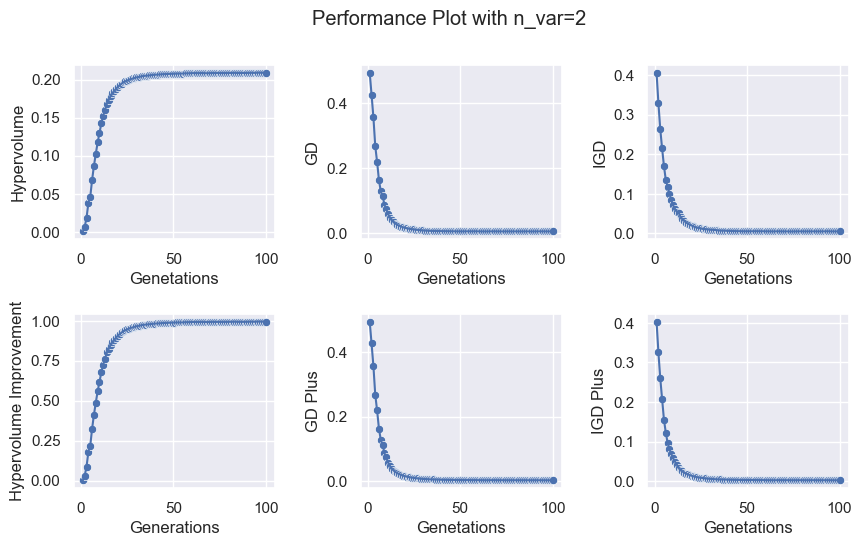

Max values of Hypervolume is 0.20909894052212716 
 , Best value of GD is 0.00434225114268515 
 , Best value of IGD is 
 0.004692420364409783 Best value of GD+ is 0.00279111686142322 , Best value of IGD+ is 0.002485552938201195


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.525)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

Text(0, 0.5, 'Objective 2')

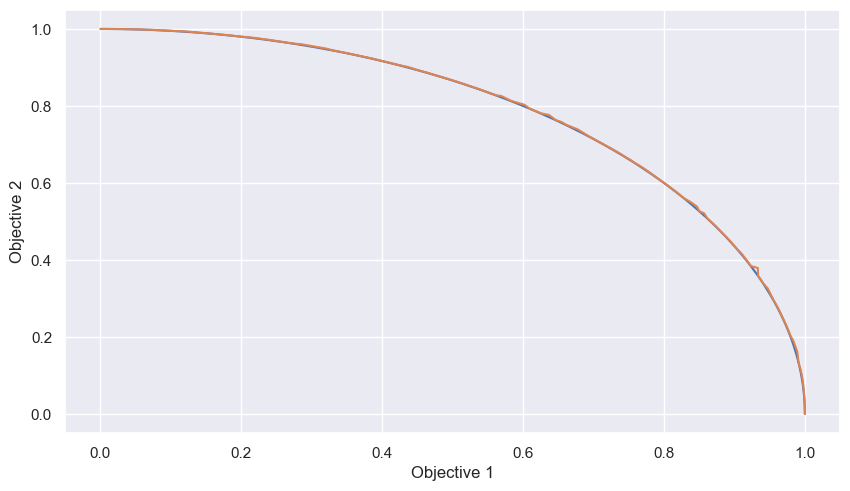

In [59]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### SPEA2 nobj = 2 , nvar = 3

In [60]:
model_list = []
problem = DTLZ2(n_obj=2,n_var=3)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     21 |  0.0554417549 |  0.0593642838 |  0.1635068974 |  0.0589901244 |  0.0330010590
     2 |      200 |     30 |  0.0333135954 |  0.0431502000 |  0.1743598266 |  0.0427171365 |  0.0243634373
     3 |      300 |     45 |  0.0253312946 |  0.0270462653 |  0.1844277258 |  0.0265483501 |  0.0166817432
     4 |      400 |     57 |  0.0162195732 |  0.0227713663 |  0.1948950941 |  0.0221262509 |  0.0099300425
     5 |      500 |     82 |  0.0108804356 |  0.0173617514 |  0.2003244026 |  0.0165878065 |  0.0072378218
     6 |      600 |    100 |  0.0085753514 |  0.0140436535 |  0.2029263889 |  0.0131588326 |  0.0053708684
     7 |      700 |    100 |  0.0078284661 |  0.0082908886 |  0.2050556446 |  0.0072225623 |  0.0043165890
     8 |      800 |    100 |  0.0069206212 |  0.0057490613 |  0.2063531358 |  0.0045917942 |  0.0037447208
     9 |      900 |    100 |  0.00625

In [61]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]

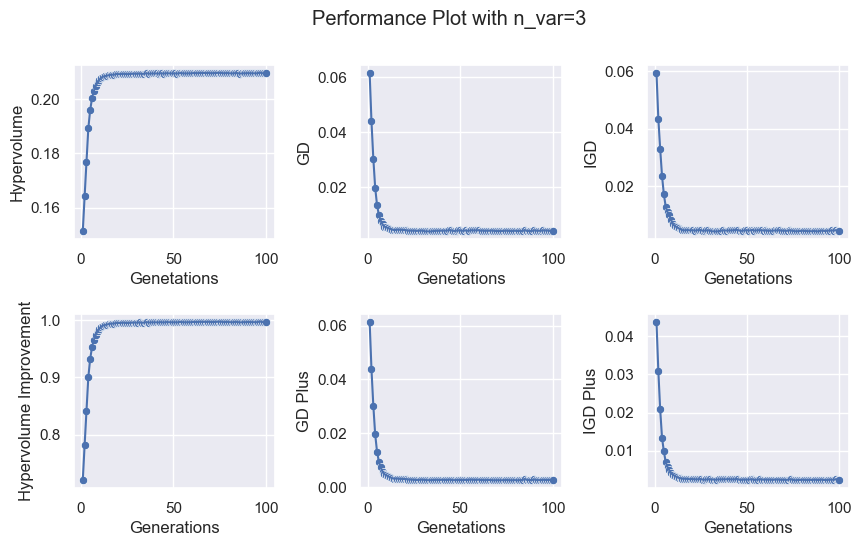

Max values of Hypervolume is 0.209615014471362 
 , Best value of GD is 0.004052930001952059 
 , Best value of IGD is 
 0.004379496536090923 Best value of GD+ is 0.002517170766489827 , Best value of IGD+ is 0.0021832826271164707


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=3')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

Text(0, 0.5, 'Objective 2')

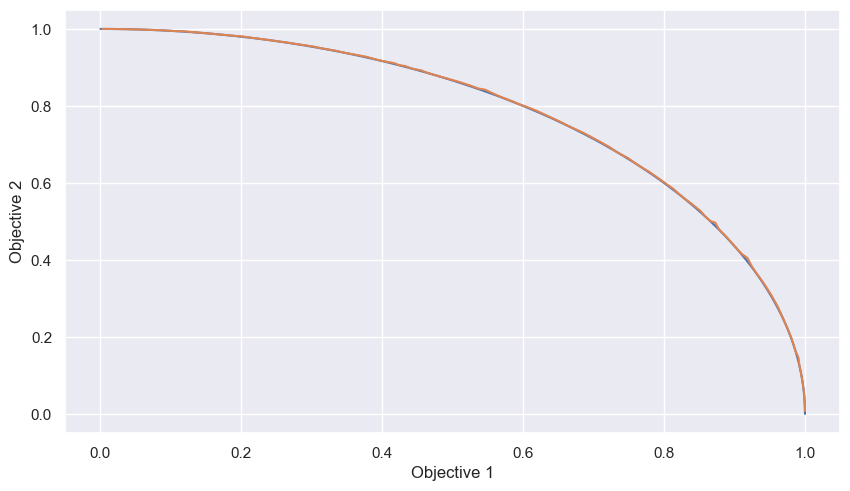

In [63]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### SPEA2 nobj = 2 , nvar = 5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |      9 |  0.1506825320 |  0.1737280317 |  0.0791073265 |  0.1737280317 |  0.1368137818
     2 |      200 |     15 |  0.1141280508 |  0.1410413816 |  0.1042320628 |  0.1410409490 |  0.0923308170
     3 |      300 |     16 |  0.0812063985 |  0.1070855061 |  0.1219140976 |  0.1070797933 |  0.0667288547
     4 |      400 |     19 |  0.0554333276 |  0.0872032179 |  0.1532339279 |  0.0871400474 |  0.0405485042
     5 |      500 |     25 |  0.0512120003 |  0.0375121042 |  0.1629900076 |  0.0372948403 |  0.0243049368
     6 |      600 |     32 |  0.0423649712 |  0.0273143932 |  0.1759807091 |  0.0270306446 |  0.0186840337
     7 |      700 |     44 |  0.0370411051 |  0.0273266178 |  0.1834502983 |  0.0268257016 |  0.0150844560
     8 |      800 |     55 |  0.0217225556 |  0.0193569584 |  0.1917085559 |  0.0188006770 |  0.0113977740
     9 |      900 |     73 |  0.01515

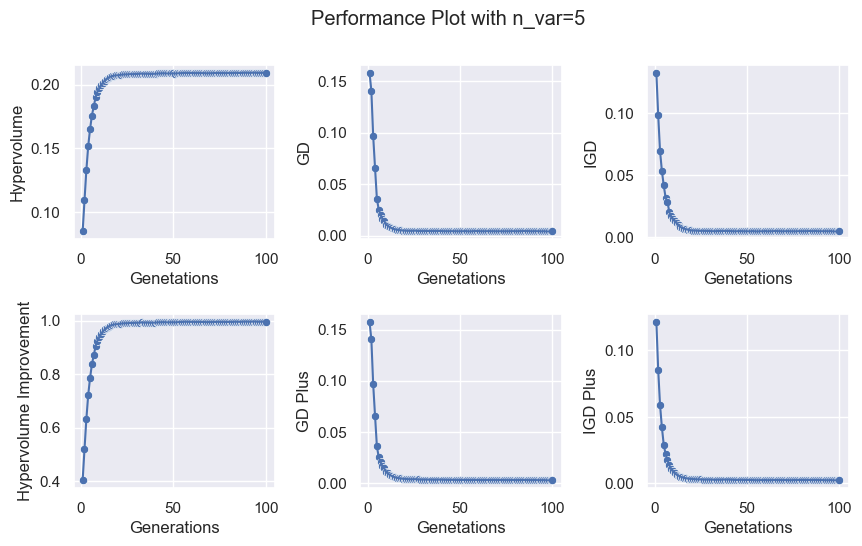

Max values of Hypervolume is 0.20943259632158884 
 , Best value of GD is 0.004076699578936206 
 , Best value of IGD is 
 0.004558779643302061 Best value of GD+ is 0.0024404845653545983 , Best value of IGD+ is 0.0022928062768906065


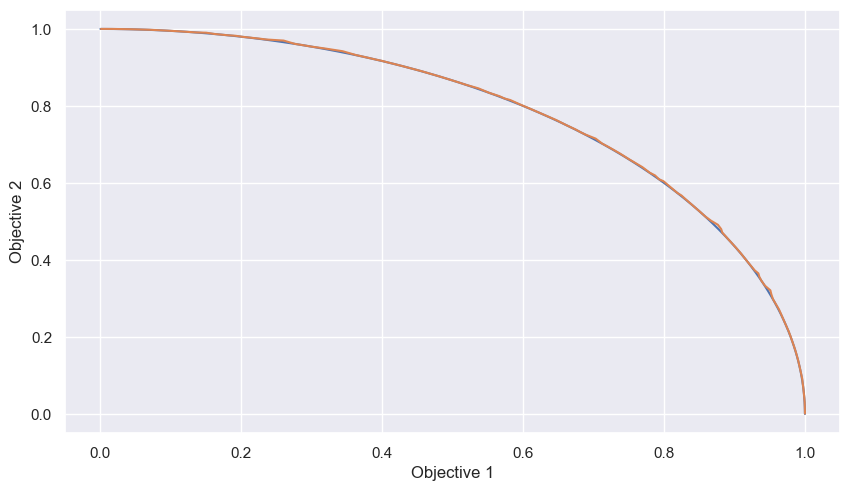

In [64]:
model_list = []
problem = DTLZ2(n_obj=2,n_var = 5)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### SPEA2 nobj = 2 , nvar = 10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     13 |  0.3395783766 |  0.4295064400 |  0.0159270915 |  0.4295064400 |  0.3294475725
     2 |      200 |      8 |  0.3115043691 |  0.3482151003 |  0.0159270915 |  0.3482151003 |  0.2897560445
     3 |      300 |     15 |  0.2610937599 |  0.3631398310 |  0.0490063473 |  0.3631398310 |  0.2473604420
     4 |      400 |     15 |  0.1900812377 |  0.2586516827 |  0.0490682247 |  0.2586516827 |  0.1812318527
     5 |      500 |     19 |  0.1619029090 |  0.2287042382 |  0.0686944746 |  0.2287041094 |  0.1503509198
     6 |      600 |     21 |  0.1533741005 |  0.1922954984 |  0.0839753152 |  0.1922945852 |  0.1346782584
     7 |      700 |     21 |  0.1102239050 |  0.1719848086 |  0.1112086746 |  0.1719801857 |  0.0856391961
     8 |      800 |     25 |  0.1013995526 |  0.1257736429 |  0.1186737452 |  0.1257689730 |  0.0756229022
     9 |      900 |     27 |  0.08403

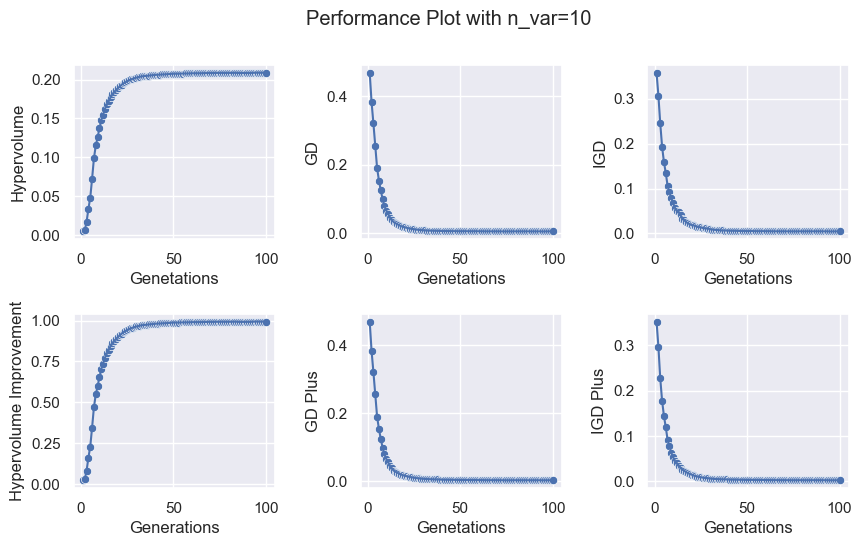

Max values of Hypervolume is 0.20890815210566097 
 , Best value of GD is 0.00414373198061385 
 , Best value of IGD is 
 0.004545924529835698 Best value of GD+ is 0.0027875414324094517 , Best value of IGD+ is 0.002487163745707015


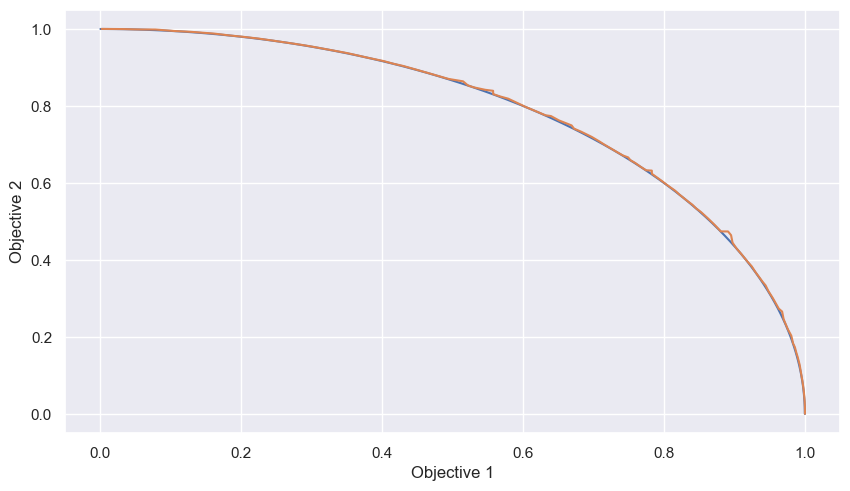

In [65]:
model_list = []
problem = DTLZ2(n_obj=2,n_var =10)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA2 nobj = 2 nvar = 2

In [66]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2,n_var=2)
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     23 |  0.0273557773 |  0.0132666311 |  0.1799816396 |  0.0127950569 |  0.0178247672
     2 |      200 |     36 |  0.0194224078 |  0.0136320712 |  0.1920936263 |  0.0129930021 |  0.0110388708
     3 |      300 |     60 |  0.0135234223 |  0.0130338181 |  0.1983548391 |  0.0124274846 |  0.0079352950
     4 |      400 |     82 |  0.0101697207 |  0.0073327862 |  0.2025537814 |  0.0065191366 |  0.0056220603
     5 |      500 |    100 |  0.0073578534 |  0.0059805010 |  0.2059359087 |  0.0048853852 |  0.0040092591
     6 |      600 |    100 |  0.0060425916 |  0.0051145423 |  0.2075210429 |  0.0038826716 |  0.0032629657
     7 |      700 |    100 |  0.0056421343 |  0.0047582311 |  0.2081347764 |  0.0034699317 |  0.0029973007
     8 |      800 |    100 |  0.0051507783 |  0.0042245989 |  0.2082359233 |  0.0029186305 |  0.0027417562
     9 |      900 |    100 |  0.00525

In [67]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar2 for i in data_avg_hyp_improvement ]





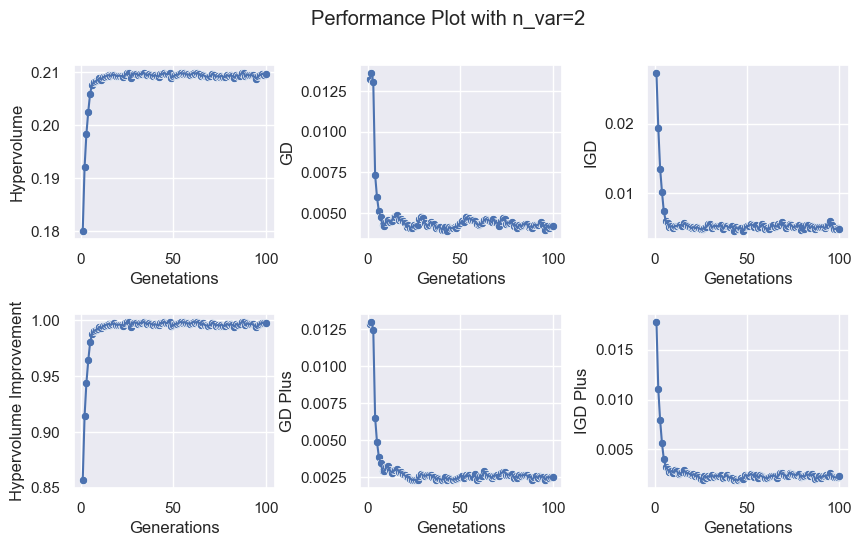

Max values of Hypervolume is 0.20985816925873774 
 , Best value of GD is 0.0038570765478514136 
 , Best value of IGD is 
 0.004477313842865975 Best value of GD+ is 0.0022917717233954036 , Best value of IGD+ is 0.00189201017664097


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

Text(0, 0.5, 'Objective 2')

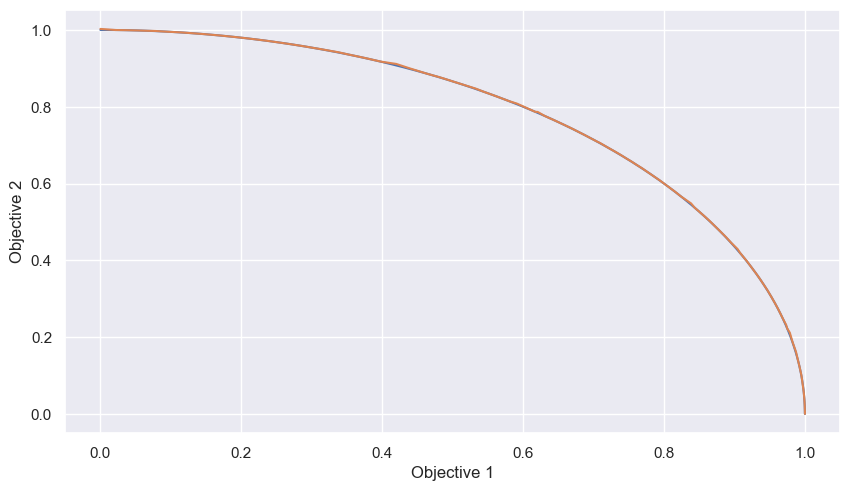

In [69]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### NSGA2 nobj = 2 nvar = 3

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     17 |  0.0513877132 |  0.0383005169 |  0.1539485903 |  0.0382926382 |  0.0397960989
     2 |      200 |     20 |  0.0419670344 |  0.0248331574 |  0.1639548766 |  0.0248194057 |  0.0297272366
     3 |      300 |     32 |  0.0332796460 |  0.0235020695 |  0.1693797842 |  0.0234617878 |  0.0259523810
     4 |      400 |     44 |  0.0318147848 |  0.0205969324 |  0.1786571054 |  0.0205196953 |  0.0197108861
     5 |      500 |     55 |  0.0254779760 |  0.0190925962 |  0.1879898041 |  0.0188914397 |  0.0140528950
     6 |      600 |     66 |  0.0221829370 |  0.0107989601 |  0.1944572470 |  0.0104757132 |  0.0105278655
     7 |      700 |     84 |  0.0160570118 |  0.0093445402 |  0.1982827563 |  0.0089219187 |  0.0084647761
     8 |      800 |    100 |  0.0127046879 |  0.0080299368 |  0.2016513528 |  0.0075127195 |  0.0068624628
     9 |      900 |    100 |  0.00996

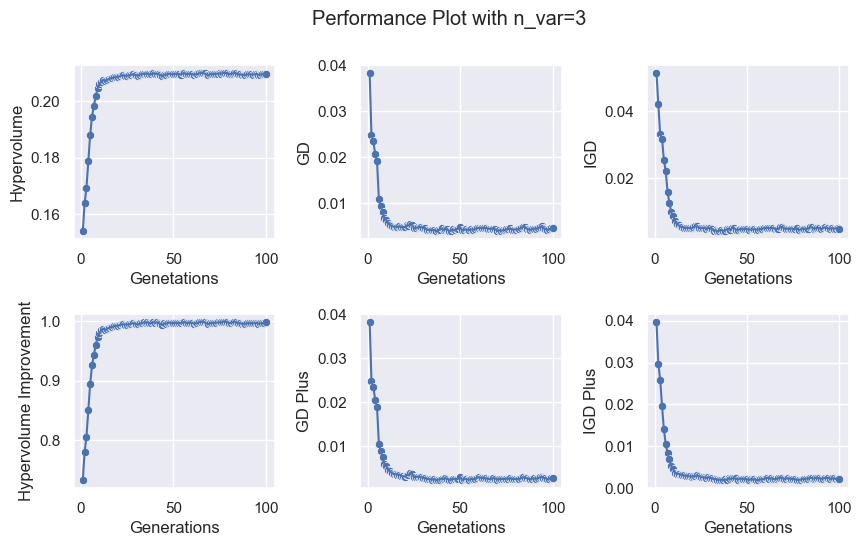

Max values of Hypervolume is 0.20995946548301828 
 , Best value of GD is 0.0037903424174582446 
 , Best value of IGD is 
 0.004271803332248256 Best value of GD+ is 0.0021467009575541983 , Best value of IGD+ is 0.0018762389907862873


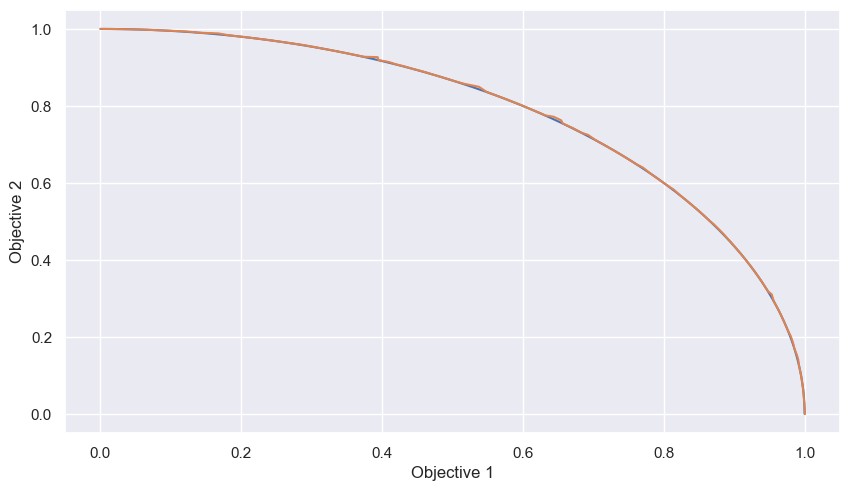

In [70]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2,n_var=3)
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]





import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=3')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA2 nobj  =2 nvar = 5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     14 |  0.1443422342 |  0.1765402677 |  0.0788681625 |  0.1765402677 |  0.1342197991
     2 |      200 |     16 |  0.1261083947 |  0.1212073491 |  0.0903084118 |  0.1212073491 |  0.1207099828
     3 |      300 |     22 |  0.0990890720 |  0.1075654664 |  0.1172476900 |  0.1075654643 |  0.0955925242
     4 |      400 |     17 |  0.0755379816 |  0.0997697219 |  0.1268707078 |  0.0997520685 |  0.0628133613
     5 |      500 |     29 |  0.0614774713 |  0.0980138216 |  0.1417597157 |  0.0980003863 |  0.0511712589
     6 |      600 |     31 |  0.0494356693 |  0.0689199235 |  0.1543899934 |  0.0689014995 |  0.0392060056
     7 |      700 |     32 |  0.0359142151 |  0.0352573680 |  0.1645561764 |  0.0352513457 |  0.0291623193
     8 |      800 |     45 |  0.0314020865 |  0.0332687000 |  0.1724499535 |  0.0332537448 |  0.0245727382
     9 |      900 |     55 |  0.02660

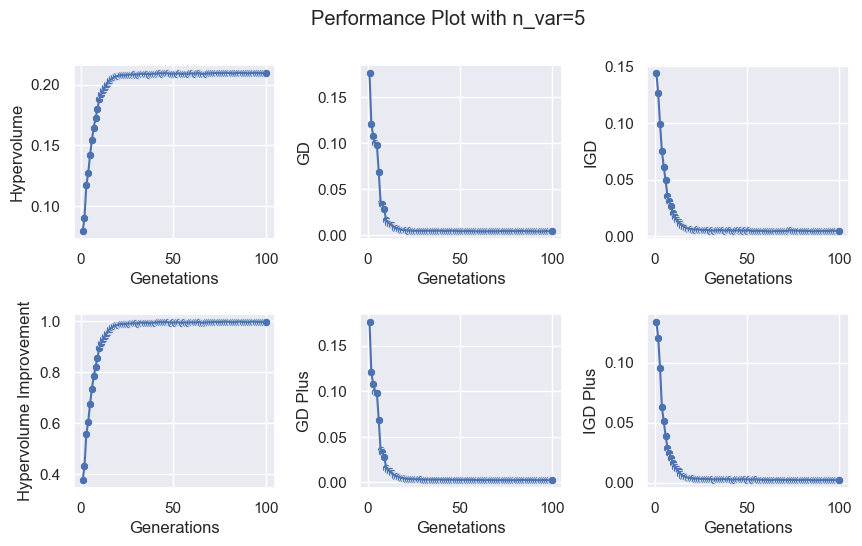

Max values of Hypervolume is 0.20982019995428938 
 , Best value of GD is 0.003923702192614034 
 , Best value of IGD is 
 0.0044266499637905165 Best value of GD+ is 0.002303466743413104 , Best value of IGD+ is 0.001909341847502765


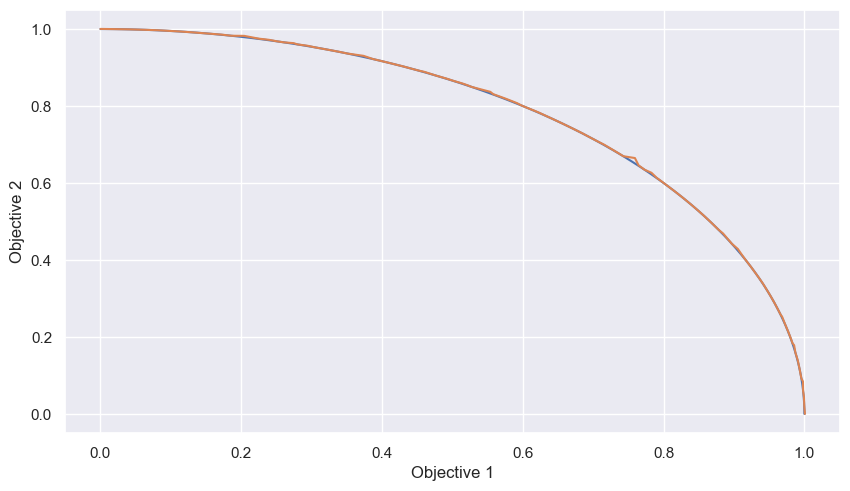

In [71]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2,n_var=5)
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]





import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA2 nobj = 2 nvar = 10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     17 |  0.3778358515 |  0.5298972095 |  0.000000E+00 |  0.5298972095 |  0.3728917842
     2 |      200 |     23 |  0.3640602516 |  0.5299402449 |  0.000000E+00 |  0.5299402449 |  0.3634792583
     3 |      300 |     19 |  0.3268869012 |  0.3962665576 |  0.0009850733 |  0.3962665576 |  0.3249563178
     4 |      400 |     15 |  0.2571346363 |  0.3106151077 |  0.0101577419 |  0.3106145629 |  0.2455084698
     5 |      500 |     16 |  0.2283291457 |  0.2739197006 |  0.0210568877 |  0.2739191189 |  0.2166103560
     6 |      600 |     18 |  0.2018005534 |  0.2625514822 |  0.0307140568 |  0.2625505963 |  0.1901367139
     7 |      700 |     22 |  0.1806675910 |  0.2284015575 |  0.0377363236 |  0.2284006930 |  0.1778748752
     8 |      800 |     26 |  0.1502618851 |  0.1943199480 |  0.0556354871 |  0.1943189650 |  0.1467626786
     9 |      900 |     26 |  0.12773

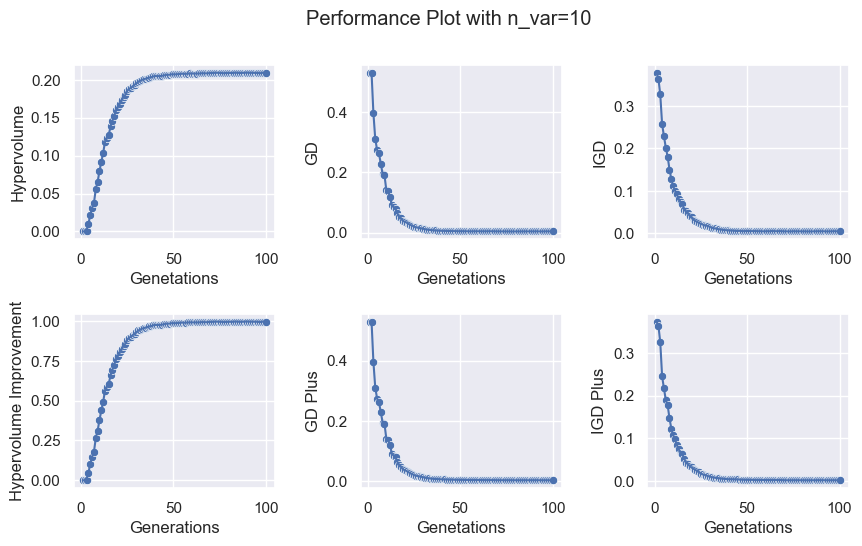

Max values of Hypervolume is 0.20932958895740522 
 , Best value of GD is 0.00391467658075263 
 , Best value of IGD is 
 0.0046458729930285774 Best value of GD+ is 0.0023723638154277155 , Best value of IGD+ is 0.0022461773299638534


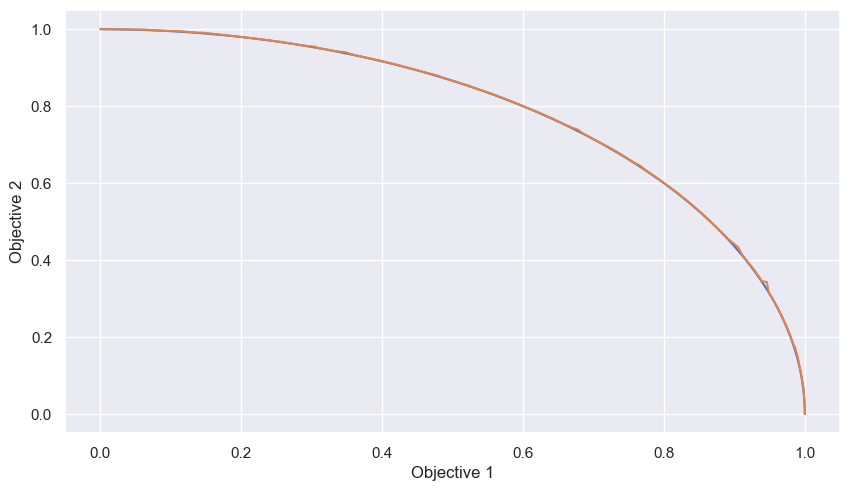

In [72]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2,n_var=10)
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### MOEAD nobj = 2 , nvar = 2

In [73]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2,n_var=2)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     33 |  0.0211282459 |  0.0218439249 |  0.1902292105 |  0.0211105985 |  0.0134233210
     2 |      200 |     98 |  0.0426681416 |  0.0073539303 |  0.1728551726 |  0.0061874993 |  0.0291790270
     3 |      300 |     94 |  0.0165918547 |  0.0060574436 |  0.1951693618 |  0.0046136826 |  0.0100994303
     4 |      400 |    100 |  0.0108029456 |  0.0052285516 |  0.2017675110 |  0.0036931649 |  0.0067818060
     5 |      500 |     98 |  0.0090016045 |  0.0039596802 |  0.2049323920 |  0.0025837619 |  0.0045811919
     6 |      600 |    100 |  0.0077720030 |  0.0039961844 |  0.2057124212 |  0.0026495538 |  0.0039981592
     7 |      700 |    100 |  0.0071126236 |  0.0037187419 |  0.2064304799 |  0.0023284428 |  0.0033459228
     8 |      800 |    100 |  0.0058315412 |  0.0035469199 |  0.2071062079 |  0.0022005417 |  0.0029011425
     9 |      900 |    100 |  0.00528

In [74]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar2 for i in data_avg_hyp_improvement ]






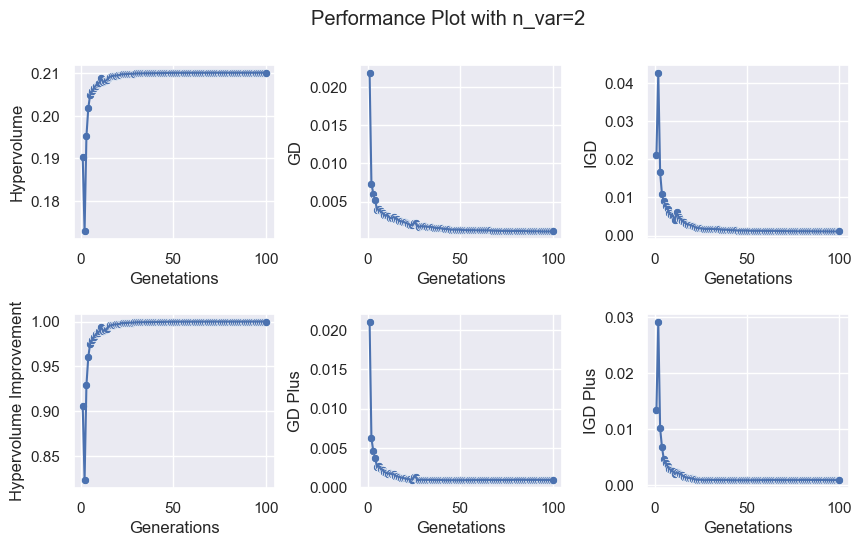

Max values of Hypervolume is 0.2101264810690297 
 , Best value of GD is 0.0011132148523758662 
 , Best value of IGD is 
 0.0011132148523758662 Best value of GD+ is 0.000843539494127952 , Best value of IGD+ is 0.0008435394941279522


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

Text(0, 0.5, 'Objective 2')

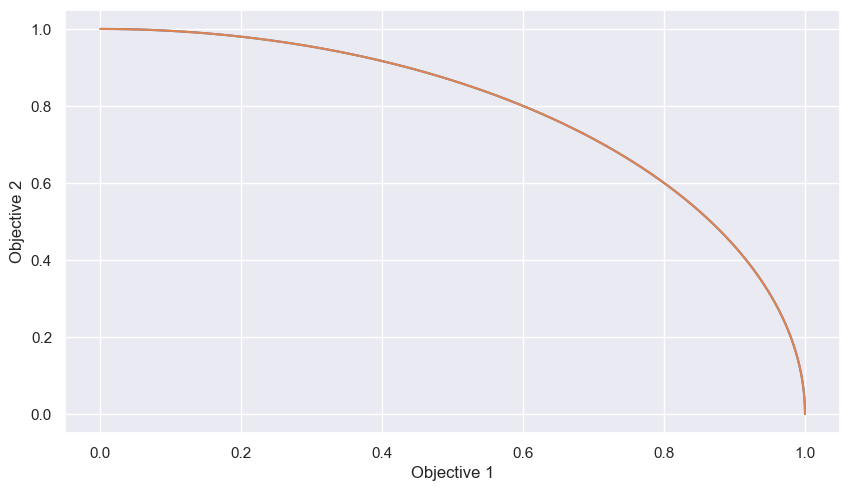

In [76]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### MOEAD nobj =2 nvars  = 3

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     17 |  0.0537549085 |  0.0403637947 |  0.1482052699 |  0.0402294514 |  0.0390330547
     2 |      200 |     76 |  0.0596733204 |  0.0101537508 |  0.1537382666 |  0.0093635719 |  0.0485346351
     3 |      300 |    100 |  0.0365874168 |  0.0149667474 |  0.1658021098 |  0.0133596767 |  0.0232945410
     4 |      400 |     83 |  0.0267002171 |  0.0043701667 |  0.1821676695 |  0.0027091867 |  0.0137371763
     5 |      500 |     92 |  0.0172795145 |  0.0044332281 |  0.1917012221 |  0.0027383015 |  0.0099027867
     6 |      600 |     94 |  0.0136327709 |  0.0041804859 |  0.1983176033 |  0.0025390630 |  0.0072829654
     7 |      700 |     98 |  0.0101708889 |  0.0047727136 |  0.2033958987 |  0.0026737002 |  0.0052696815
     8 |      800 |    100 |  0.0087593236 |  0.0040263562 |  0.2049666956 |  0.0023186448 |  0.0046058345
     9 |      900 |     99 |  0.00698

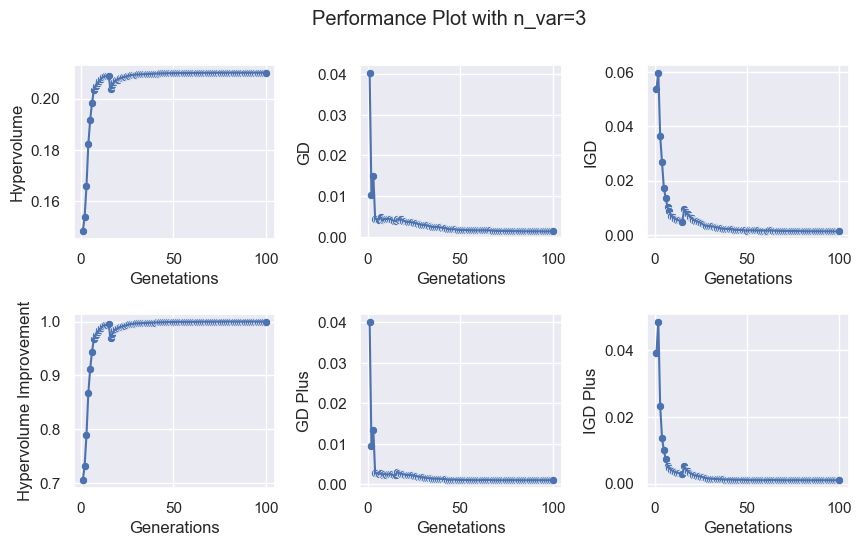

Max values of Hypervolume is 0.21011617990982262 
 , Best value of GD is 0.001305552607996672 
 , Best value of IGD is 
 0.001332082325229877 Best value of GD+ is 0.0009608080759394789 , Best value of IGD+ is 0.0009608080759394788


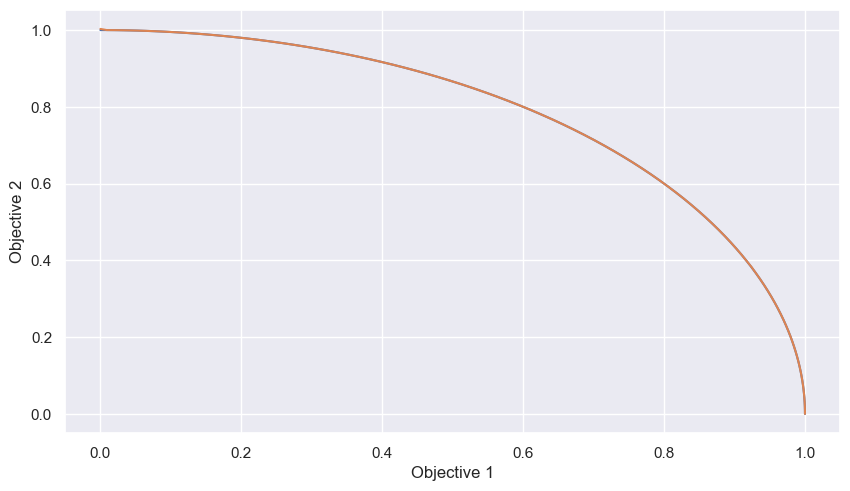

In [77]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2,n_var=3)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=3')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### MOEAD nobj = 2 nvars = 5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     12 |  0.1169566804 |  0.1206062401 |  0.0830542659 |  0.1206062401 |  0.1072461763
     2 |      200 |     78 |  0.1322028243 |  0.0963057454 |  0.0892762496 |  0.0963057454 |  0.1169059300
     3 |      300 |     94 |  0.0843465886 |  0.0673393757 |  0.1287806714 |  0.0672749464 |  0.0812183634
     4 |      400 |     79 |  0.0655757479 |  0.0513036736 |  0.1384957969 |  0.0512028916 |  0.0573417119
     5 |      500 |     91 |  0.0497134959 |  0.0384944585 |  0.1644712046 |  0.0384330538 |  0.0418774429
     6 |      600 |     98 |  0.0328283442 |  0.0231024192 |  0.1727864390 |  0.0229434827 |  0.0259250559
     7 |      700 |     91 |  0.0305016302 |  0.0101603478 |  0.1771815688 |  0.0096288288 |  0.0167088948
     8 |      800 |     97 |  0.0206312791 |  0.0076888323 |  0.1872054759 |  0.0069911109 |  0.0123464883
     9 |      900 |     98 |  0.01642

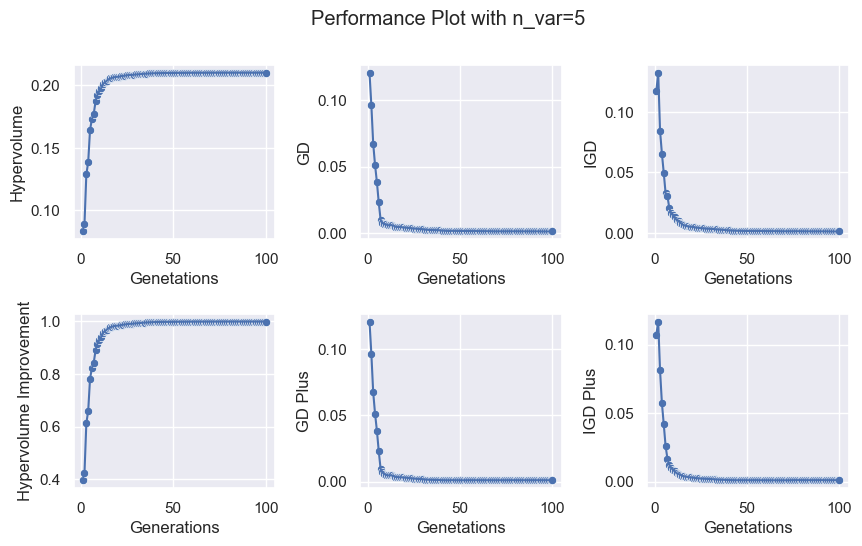

Max values of Hypervolume is 0.21005981280326136 
 , Best value of GD is 0.0013494265181094606 
 , Best value of IGD is 
 0.0013256363492057089 Best value of GD+ is 0.0009420590441228532 , Best value of IGD+ is 0.0008891366784194169


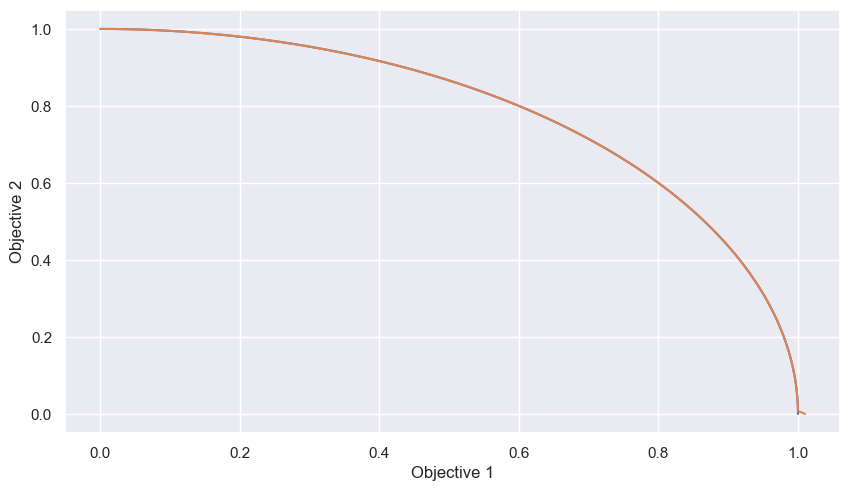

In [78]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2,n_var=5)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### MOEAD nobjs = 2, nvars = 10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     12 |  0.3217136408 |  0.4410974669 |  0.0119808275 |  0.4410974669 |  0.3192903011
     2 |      200 |     66 |  0.2660980462 |  0.2974129118 |  0.0495431131 |  0.2974129118 |  0.2616970812
     3 |      300 |     71 |  0.1628154013 |  0.1695371533 |  0.0625440555 |  0.1695371533 |  0.1542877596
     4 |      400 |     72 |  0.1206857873 |  0.0955660618 |  0.0833342999 |  0.0955563122 |  0.1036862759
     5 |      500 |     81 |  0.0774552564 |  0.0592222303 |  0.1342169549 |  0.0591931287 |  0.0715963758
     6 |      600 |     72 |  0.0662393834 |  0.0558956184 |  0.1427340396 |  0.0558750595 |  0.0583041248
     7 |      700 |     98 |  0.0488893076 |  0.0294694216 |  0.1597881628 |  0.0294435096 |  0.0380793228
     8 |      800 |     86 |  0.0377297422 |  0.0315484843 |  0.1707596514 |  0.0314488408 |  0.0322639297
     9 |      900 |     95 |  0.03470

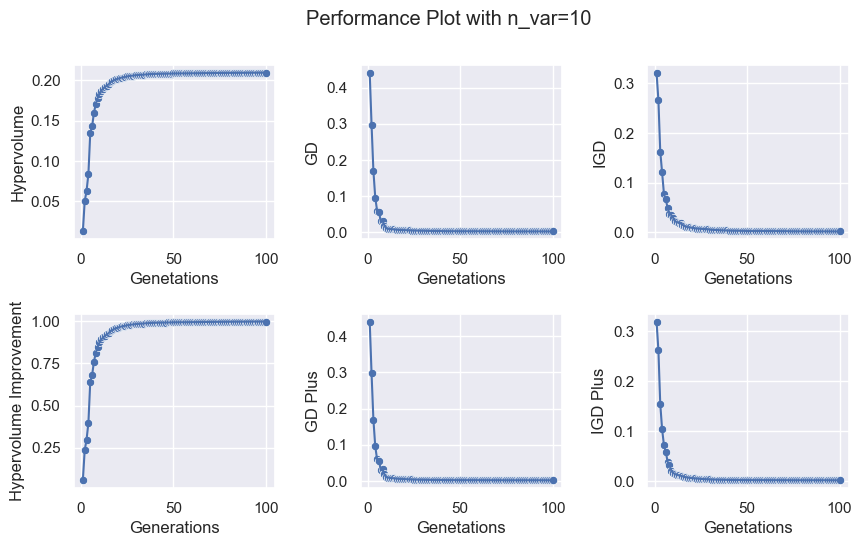

Max values of Hypervolume is 0.2096337379457573 
 , Best value of GD is 0.0016402875012773294 
 , Best value of IGD is 
 0.001691732810412998 Best value of GD+ is 0.0012211850895464383 , Best value of IGD+ is 0.0012211850895464383


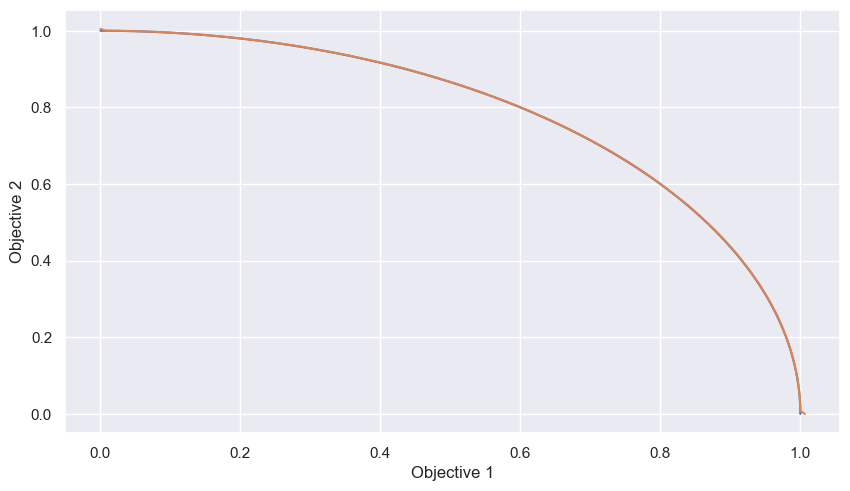

In [79]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2,n_var=10)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA3 nobj = 2 nvars = 2

In [80]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2,n_var=2)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     14 |  0.0390221696 |  0.0157816835 |  0.1659082816 |  0.0154849358 |  0.0248873807
     2 |      200 |     21 |  0.0293682736 |  0.0106965084 |  0.1766005375 |  0.0101078794 |  0.0196672630
     3 |      300 |     30 |  0.0255354397 |  0.0087768839 |  0.1838236347 |  0.0078238141 |  0.0169660078
     4 |      400 |     49 |  0.0140831785 |  0.0069101602 |  0.1950633783 |  0.0061387080 |  0.0098042006
     5 |      500 |     69 |  0.0101924343 |  0.0059701988 |  0.2030920287 |  0.0051200400 |  0.0079626000
     6 |      600 |     79 |  0.0079213839 |  0.0050405373 |  0.2049979434 |  0.0044897290 |  0.0062174666
     7 |      700 |     86 |  0.0059624380 |  0.0046055741 |  0.2070990897 |  0.0040476317 |  0.0046873722
     8 |      800 |     84 |  0.0059316825 |  0.0043572242 |  0.2072753585 |  0.0037231047 |  0.0044430989
     9 |      900 |     89 |  0.00408

In [81]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar2 for i in data_avg_hyp_improvement ]


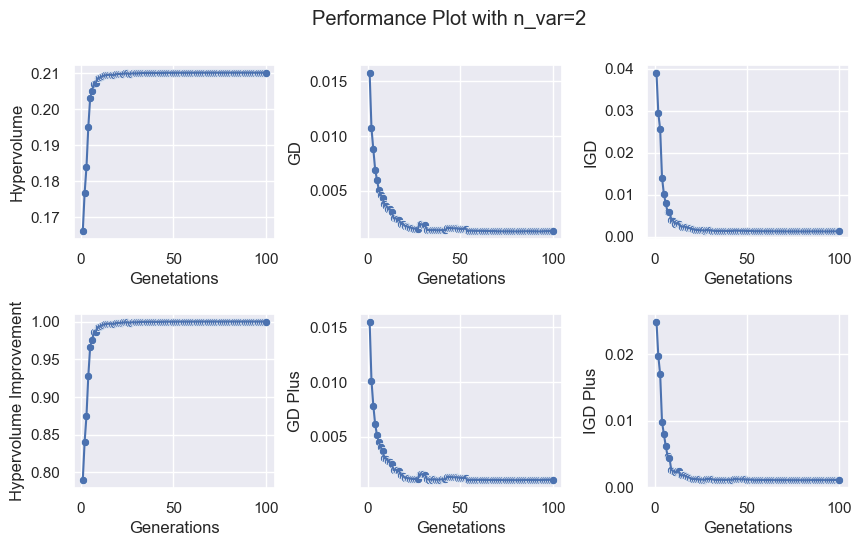

Max values of Hypervolume is 0.21013603174778037 
 , Best value of GD is 0.001260307459914367 
 , Best value of IGD is 
 0.0012603074599143666 Best value of GD+ is 0.0010305880939538176 , Best value of IGD+ is 0.001027478815726207


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

Text(0, 0.5, 'Objective 2')

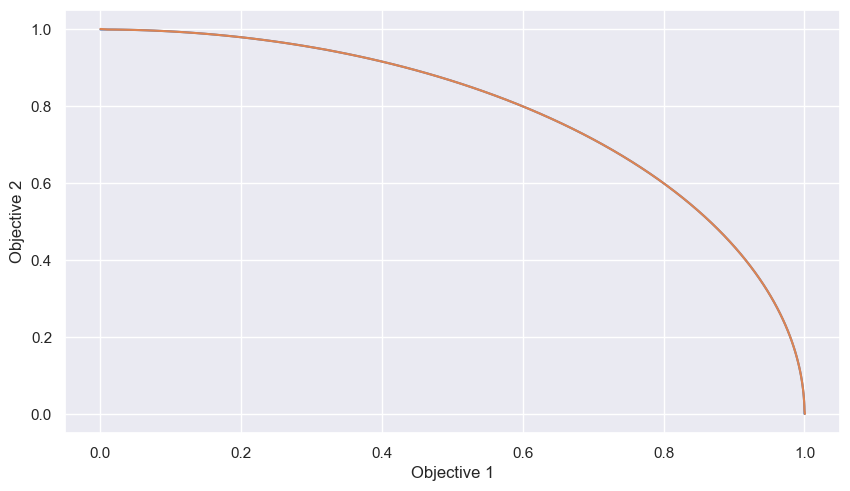

In [83]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### NSGA3 nobj = 2 , nvars  = 3

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     14 |  0.0557038305 |  0.0358004144 |  0.1528108053 |  0.0357908474 |  0.0401705017
     2 |      200 |     10 |  0.0617696986 |  0.0271390413 |  0.1382659026 |  0.0271197918 |  0.0402778446
     3 |      300 |     20 |  0.0410114007 |  0.0178214862 |  0.1664378783 |  0.0177196194 |  0.0268803080
     4 |      400 |     28 |  0.0284278730 |  0.0158085421 |  0.1777308206 |  0.0157224661 |  0.0197567268
     5 |      500 |     27 |  0.0250322165 |  0.0143721940 |  0.1817711299 |  0.0141304894 |  0.0178111509
     6 |      600 |     39 |  0.0208286655 |  0.0120146102 |  0.1830118720 |  0.0117405792 |  0.0161985220
     7 |      700 |     45 |  0.0195851429 |  0.0095527403 |  0.1931136191 |  0.0089662984 |  0.0102991756
     8 |      800 |     46 |  0.0178369991 |  0.0074710311 |  0.1970079798 |  0.0068403795 |  0.0093671758
     9 |      900 |     64 |  0.01203

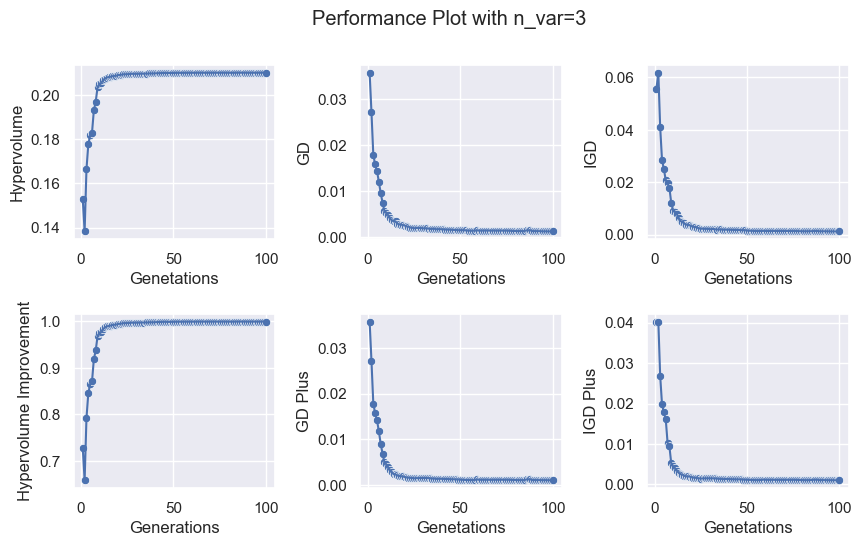

Max values of Hypervolume is 0.21010058546815596 
 , Best value of GD is 0.0012081327793732743 
 , Best value of IGD is 
 0.0012081327793732743 Best value of GD+ is 0.0010017174503674576 , Best value of IGD+ is 0.0009996568746459924


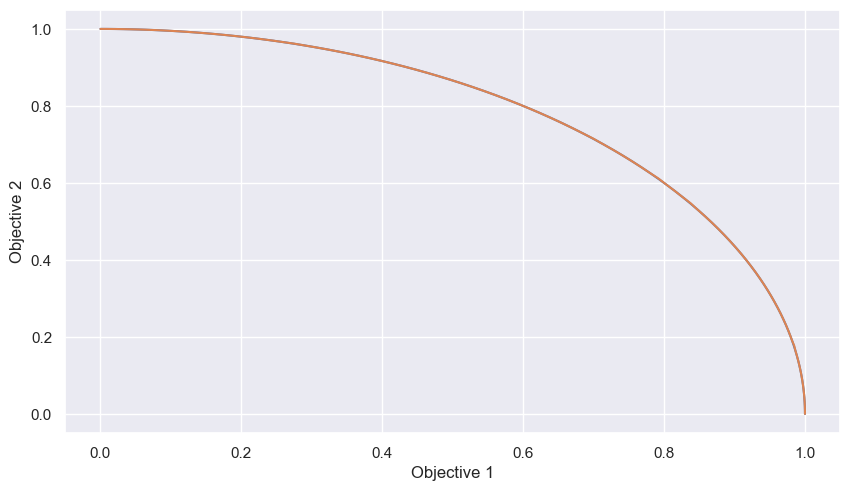

In [84]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2,n_var=3)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=3')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA3 nobj = 2 , nvars = 5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     10 |  0.2049166638 |  0.2008944022 |  0.0484031377 |  0.2008944022 |  0.1777732340
     2 |      200 |     12 |  0.1696171665 |  0.1897920755 |  0.0160427662 |  0.1897920755 |  0.1568137871
     3 |      300 |     15 |  0.1029857390 |  0.1574955279 |  0.0986514663 |  0.1574945295 |  0.0976200109
     4 |      400 |     13 |  0.0953153472 |  0.1367527782 |  0.1067726653 |  0.1367515997 |  0.0832148531
     5 |      500 |     14 |  0.0690980098 |  0.0896115133 |  0.1170743209 |  0.0895963186 |  0.0565440056
     6 |      600 |     18 |  0.0573247149 |  0.0620919414 |  0.1420863621 |  0.0620914249 |  0.0465155170
     7 |      700 |     22 |  0.0498459675 |  0.0494745496 |  0.1545149929 |  0.0494657344 |  0.0444334649
     8 |      800 |     21 |  0.0544156948 |  0.0345943222 |  0.1646503684 |  0.0345793394 |  0.0452340865
     9 |      900 |     21 |  0.04951

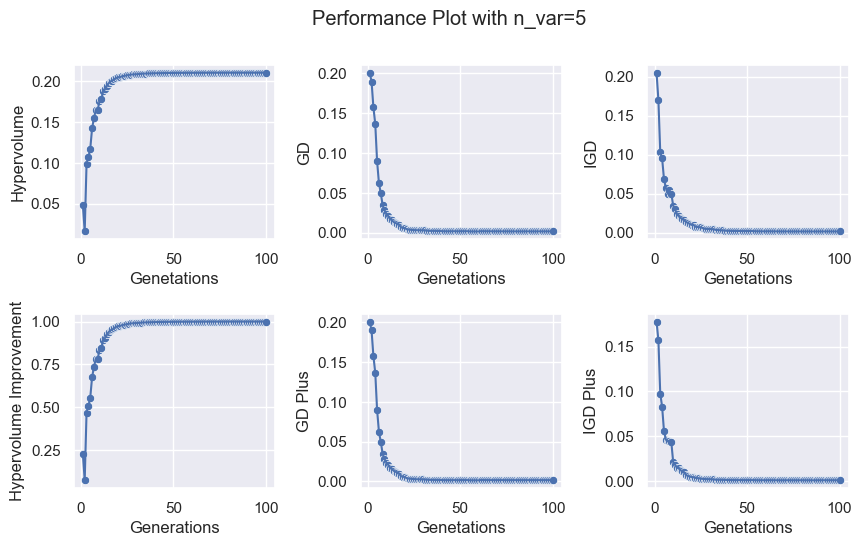

Max values of Hypervolume is 0.21009330169941123 
 , Best value of GD is 0.0015477759993092163 
 , Best value of IGD is 
 0.001400988958018924 Best value of GD+ is 0.001190861744043157 , Best value of IGD+ is 0.0011193776977984078


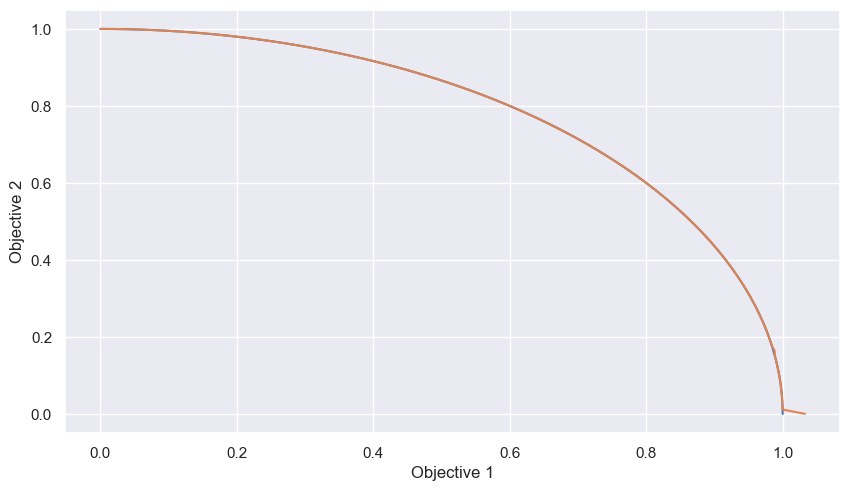

In [85]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2,n_var=5)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA3 nobj = 2 nvars = 10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |      9 |  0.4511144444 |  0.5555634346 |  0.000000E+00 |  0.5555634346 |  0.4506500690
     2 |      200 |      8 |  0.3795102282 |  0.4985823043 |  0.000000E+00 |  0.4985823043 |  0.3745661609
     3 |      300 |      4 |  0.3802150064 |  0.4594698543 |  0.000000E+00 |  0.4594698543 |  0.3085380971
     4 |      400 |      8 |  0.3353025237 |  0.3978656871 |  0.0385875412 |  0.3978656871 |  0.3316391536
     5 |      500 |      9 |  0.2277971293 |  0.3160576318 |  0.0179362299 |  0.3160576318 |  0.2244931691
     6 |      600 |      7 |  0.2883694371 |  0.2771615643 |  0.0414545469 |  0.2771615643 |  0.2856912309
     7 |      700 |      9 |  0.1676659022 |  0.2100372093 |  0.0642489131 |  0.2100097115 |  0.1098271261
     8 |      800 |      7 |  0.1999325447 |  0.1804004368 |  0.0418765557 |  0.1804004368 |  0.1721505097
     9 |      900 |     12 |  0.22500

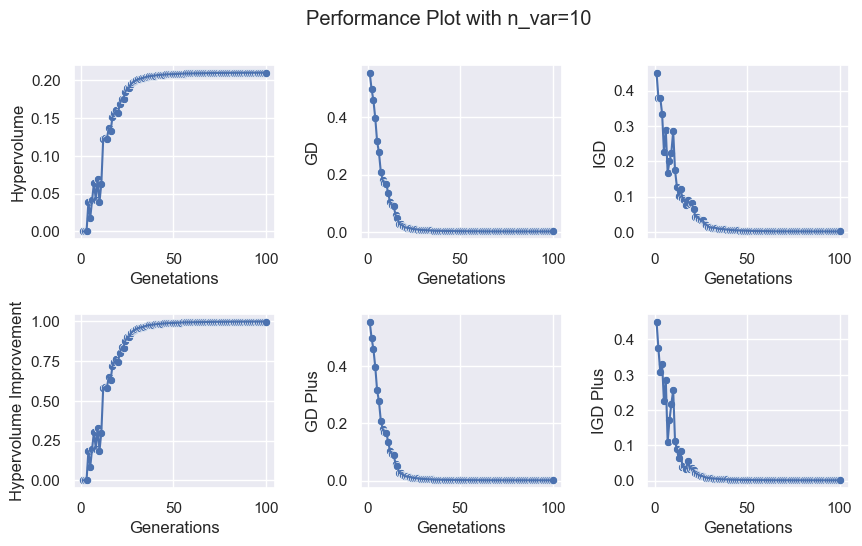

Max values of Hypervolume is 0.20983462227637842 
 , Best value of GD is 0.0014327640590153005 
 , Best value of IGD is 
 0.0014349538604689527 Best value of GD+ is 0.0011896978023315167 , Best value of IGD+ is 0.0011831419432233304


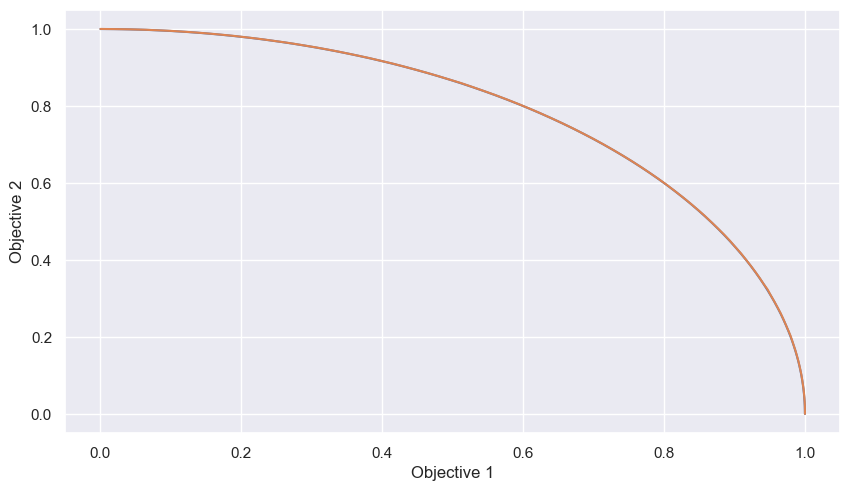

In [86]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2,n_var=10)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()